# Football Data Analysis

The dataset is a collection of basic but crucial stats of the English Premier League 2020-21 season. The dataset has all the players that played in the EPL and their standard stats such as Goals, Assists, xG, xA, Passes Attempted, Pass Accuracy and more!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the dataset

In [2]:
pl_df = pd.read_excel(r"C:\Users\dell\Desktop\Python Data Analysis Projects\Football Data Analysis\EPL_20_21.ods", engine = 'odf')

In [3]:
pl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
#displaying basic information of the dataframe
pl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [5]:
pl_df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [6]:
pl_df.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [7]:
#displaying statistical information of the dataframe
pl_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,532.0,25.500000,4.319404,16.0,22.00,26.00,29.000,38.00
Matches,532.0,19.535714,11.840459,1.0,9.00,21.00,30.000,38.00
Starts,532.0,15.714286,11.921161,0.0,4.00,15.00,27.000,38.00
Mins,532.0,1411.443609,1043.171856,1.0,426.00,1345.00,2303.500,3420.00
Goals,532.0,1.853383,3.338009,0.0,0.00,1.00,2.000,23.00
Assists,532.0,1.287594,2.095191,0.0,0.00,0.00,2.000,14.00
Passes_Attempted,532.0,717.750000,631.372522,0.0,171.50,573.50,1129.500,3214.00
Perc_Passes_Completed,532.0,77.823872,13.011631,-1.0,73.50,79.20,84.625,100.00
Penalty_Goals,532.0,0.191729,0.850881,0.0,0.00,0.00,0.000,9.00
Penalty_Attempted,532.0,0.234962,0.975818,0.0,0.00,0.00,0.000,10.00


In [8]:
#displaying null values
pl_df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

### Finding Minutes played per match and Goals scored per match for each player

In [9]:
pl_df['MinsPerMatch'] = (pl_df['Mins']/pl_df['Matches']).astype(int)
pl_df['GoalsPerMatch'] = (pl_df['Goals']/pl_df['Matches']).astype(float)

In [10]:
pl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


### Total goals scored in the season

In [11]:
total_goals = pl_df['Goals'].sum()

In [12]:
total_goals

986

### Total penalty goals scored in the season

In [13]:
total_penalty_goals = pl_df.Penalty_Goals.sum()

In [14]:
total_penalty_goals

102

### Total penalty attempts in the season

In [15]:
total_penalty_attempts = pl_df.Penalty_Attempted.sum()

In [16]:
total_penalty_attempts

125

### Displaying pie chart for penalty scored vs penalty missed

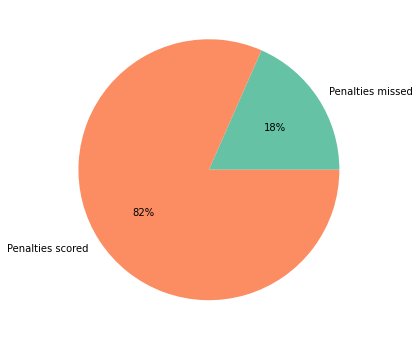

In [17]:
plt.figure(figsize = (13,6))
total_penalty_missed = total_penalty_attempts - total_penalty_goals
data = [total_penalty_missed, total_penalty_goals]
labels = ['Penalties missed', 'Penalties scored']
color = sns.color_palette('Set2')
plt.pie(data, labels = labels, colors = color, autopct = '%.0f%%')
plt.show()

### Displaying unique positions

In [18]:
pl_df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

### DIsplaying all FW players

In [19]:
pl_df[pl_df['Position'] == 'FW']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


### Displaying players from different nations

In [20]:
#len(pl_df['Nationality'].unique())
#or
np.size(pl_df['Nationality'].unique())

59

### Displaying most players playing for which nation

<AxesSubplot:xlabel='Nationality'>

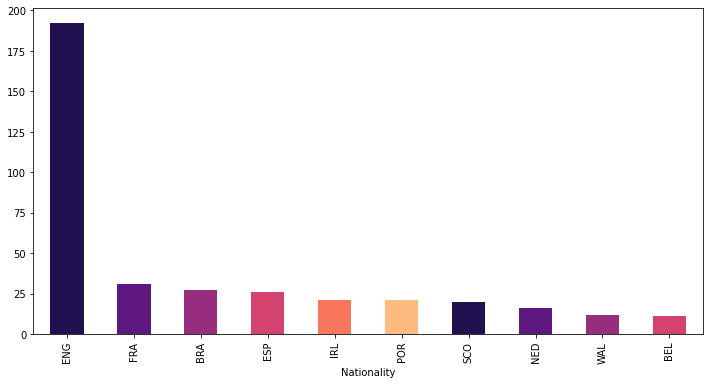

In [21]:
nationality = pl_df.groupby('Nationality').size().sort_values(ascending  = False)
nationality.head(10).plot(kind = 'bar', figsize = (12, 6), color = sns.color_palette('magma'))

### Displaying clubs with maximum players in their squad

<AxesSubplot:>

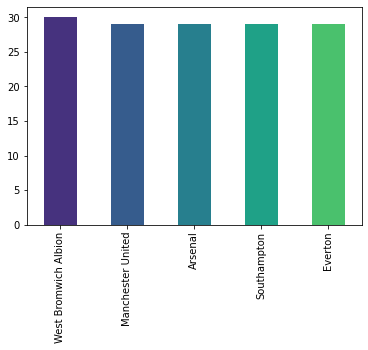

In [22]:
pl_df['Club'].value_counts().nlargest(5).plot(kind = 'bar', color = sns.color_palette('viridis'))

### Displaying clubs with least players in their squad

<AxesSubplot:>

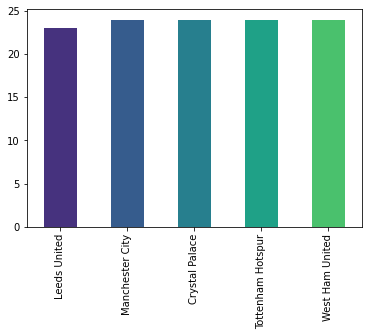

In [23]:
pl_df['Club'].value_counts().nsmallest(5).plot(kind = 'bar', color = sns.color_palette('viridis'))

### Displaying players based on age groups

In [24]:
Under20 = pl_df[pl_df['Age'] <= 20]
age20_25 = pl_df[(pl_df['Age'] > 20) & (pl_df['Age'] <= 25)]
age25_30 = pl_df[(pl_df['Age'] > 25) & (pl_df['Age'] <= 30)]
Above30 = pl_df[pl_df['Age'] > 30]

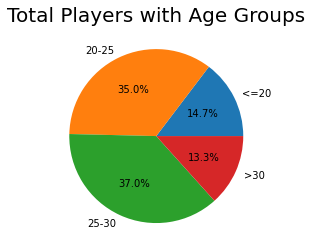

In [25]:
x = np.array([Under20['Name'].count(), age20_25['Name'].count(), age25_30['Name'].count(), Above30['Name'].count()])
mylabels = ['<=20', '20-25', '25-30', '>30']
plt.title('Total Players with Age Groups', fontsize = 20)
plt.pie(x, labels = mylabels, autopct = "%.1f%%")
plt.show()

### Displaying total number of under 20 players in each club

<AxesSubplot:>

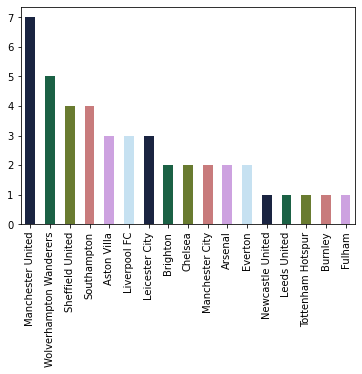

In [26]:
players_u20 = pl_df[pl_df['Age'] < 20]
players_u20['Club'].value_counts().plot(kind = 'bar', color = sns.color_palette('cubehelix'))

### Displaying under 20 players in Manchester United

In [27]:
players_u20[players_u20['Club'] == 'Manchester United']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0.225806
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0.000000
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0.000000
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0.500000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.00,0.00,0,0,1,0.000000


### Displaying under 20 players in Manchester United

In [28]:
players_u20[players_u20['Club'] == 'Chelsea']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0.000000


### Average age of players in each club

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

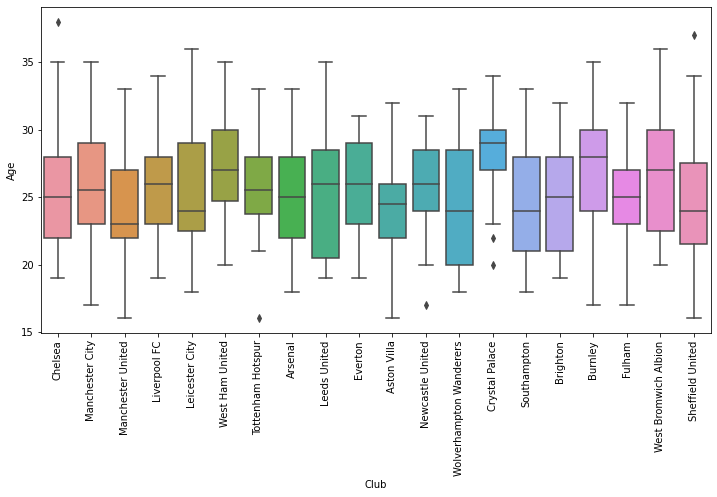

In [29]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Club', y = 'Age', data = pl_df)
plt.xticks(rotation = 90)

In [30]:
num_player = pl_df.groupby('Club').size()
data = (pl_df.groupby('Club')['Age'].sum())/(num_player)
data.sort_values(ascending = False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

### Displaying total assists from each club

Text(0.5, 1.0, 'Plot of Clubs vs Total Assists')

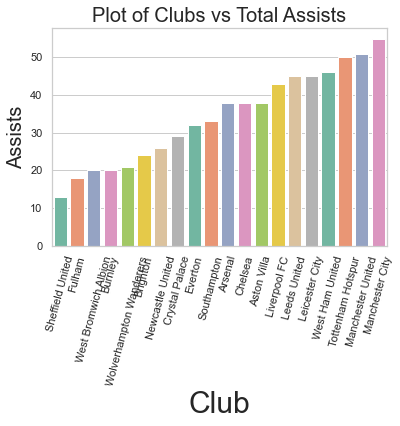

In [31]:
assists_by_clubs = pd.DataFrame(pl_df.groupby('Club', as_index = False)['Assists'].sum())
sns.set_theme(style = "whitegrid", color_codes = True)
ax = sns.barplot(x = 'Club', y = 'Assists', data = assists_by_clubs.sort_values(by = 'Assists'), palette = 'Set2')
ax.set_xlabel('Club', fontsize=30)
ax.set_ylabel('Assists', fontsize=20)
plt.xticks(rotation = 75)
plt.rcParams['figure.figsize'] = (20,8)
plt.title('Plot of Clubs vs Total Assists', fontsize = 20)

### Displaying top 10 players by assists

In [32]:
top_10_assists = pl_df[['Name', 'Club', 'Assists', 'Matches']].nlargest(n=10, columns='Assists')

In [33]:
top_10_assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


### Displaying total goals by each club

Text(0.5, 1.0, 'Plot of Clubs vs Total Goals')

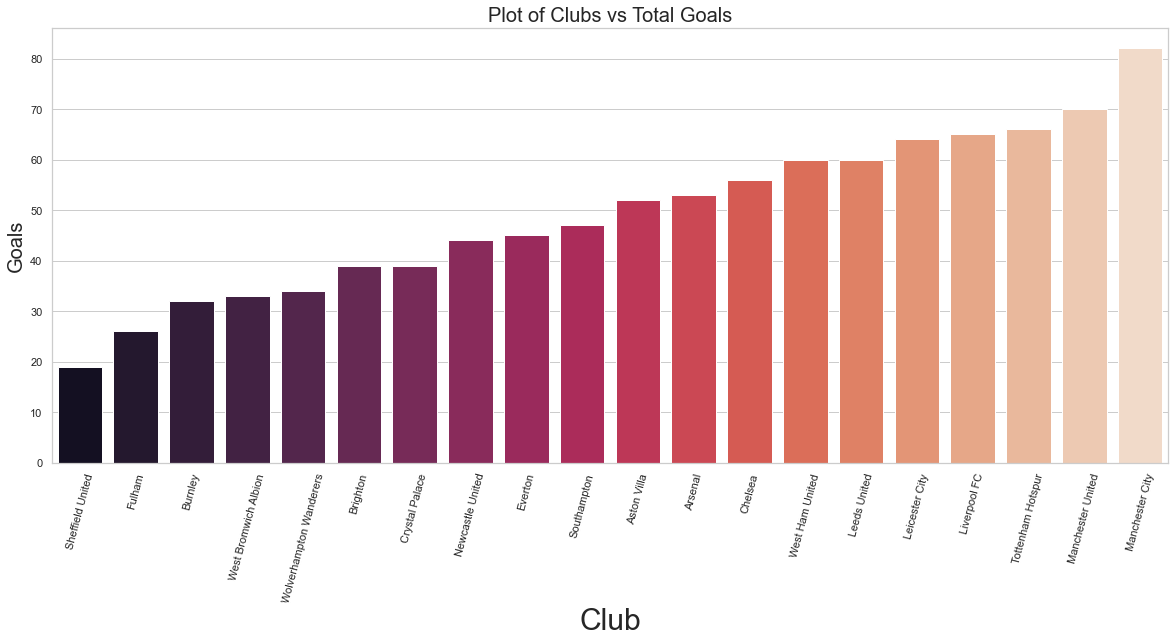

In [34]:
goals_by_clubs = pd.DataFrame(pl_df.groupby('Club', as_index = False)['Goals'].sum())
sns.set_theme(style = "whitegrid", color_codes = True)
ax = sns.barplot(x = 'Club', y = 'Goals', data = goals_by_clubs.sort_values(by = 'Goals'), palette = 'rocket')
ax.set_xlabel('Club', fontsize=30)
ax.set_ylabel('Goals', fontsize=20)
plt.xticks(rotation = 75)
plt.rcParams['figure.figsize'] = (20,8)
plt.title('Plot of Clubs vs Total Goals', fontsize = 20)

### Displaying most goals by players

In [35]:
top_10_goals = pl_df[['Name', 'Club', 'Goals', 'Matches']].nlargest(n=10, columns='Goals')

In [36]:
top_10_goals

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


### Displaying top 10 goals per match

In [37]:
top_10_goals_per_match = pl_df[['Name', 'GoalsPerMatch', 'Matches', 'Goals']].nlargest(n=10, columns = 'GoalsPerMatch')

In [38]:
top_10_goals_per_match

,Name,GoalsPerMatch,Matches,Goals
162,Harry Kane,0.657143,35,23
81,Mohamed Salah,0.594595,37,22
307,Joe Willock,0.571429,14,8
145,Jesse Lingard,0.562500,16,9
175,Gareth Bale,0.550000,20,11
74,Anthony Elanga,0.500000,2,1
51,Bruno Fernandes,0.486486,37,18
237,Dominic Calvert-Lewin,0.484848,33,16
120,Kelechi Iheanacho,0.480000,25,12
92,Diogo Jota,0.473684,19,9


In [39]:
pl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


### Displaying pie chart for goals with assists and goals without assists

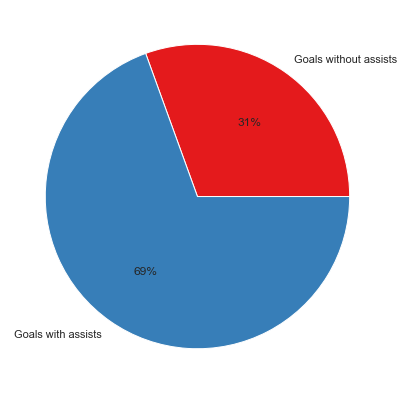

In [40]:
plt.figure(figsize = (14,7))
assists = pl_df['Assists'].sum()
data = [total_goals - assists, assists]
labels = ['Goals without assists', 'Goals with assists']
color = sns.color_palette('Set1')
plt.pie(data, labels = labels, colors = color, autopct = '%.0f%%')
plt.show()

### Displaying top 10 players with most yellow cards

<AxesSubplot:title={'center':'Players with the most yellow cards'}, xlabel='Name', ylabel='Number of yellow cards'>

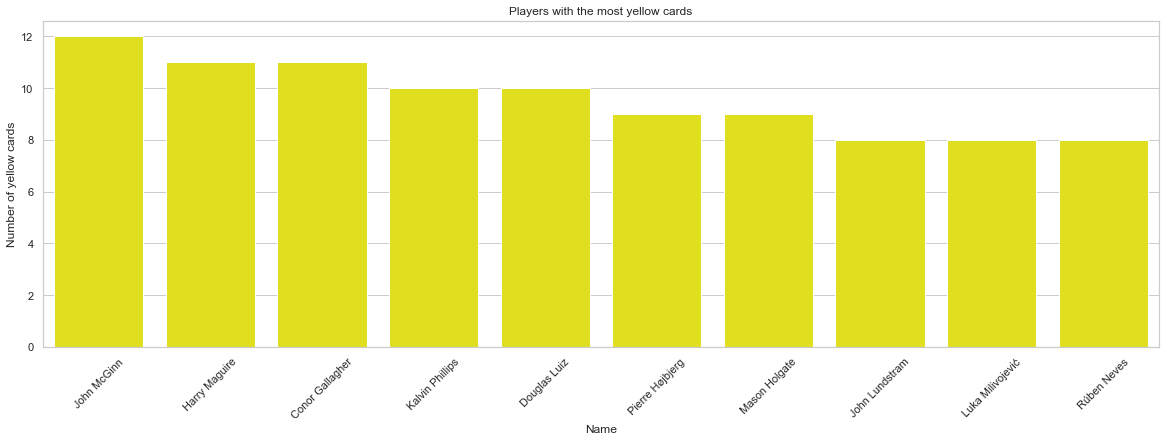

In [41]:
pl_yellow_cards = pl_df.sort_values(by = 'Yellow_Cards', ascending = False)[:10]
plt.figure(figsize = (20,6))
plt.title('Players with the most yellow cards')
c = sns.barplot(x=pl_yellow_cards['Name'], y=pl_yellow_cards['Yellow_Cards'], label = 'Players', color='yellow')
plt.ylabel('Number of yellow cards')
c.set_xticklabels(c.get_xticklabels(), rotation = 45)
c

<AxesSubplot:title={'center':'Players with the most red cards'}, xlabel='Name', ylabel='Number of red cards'>

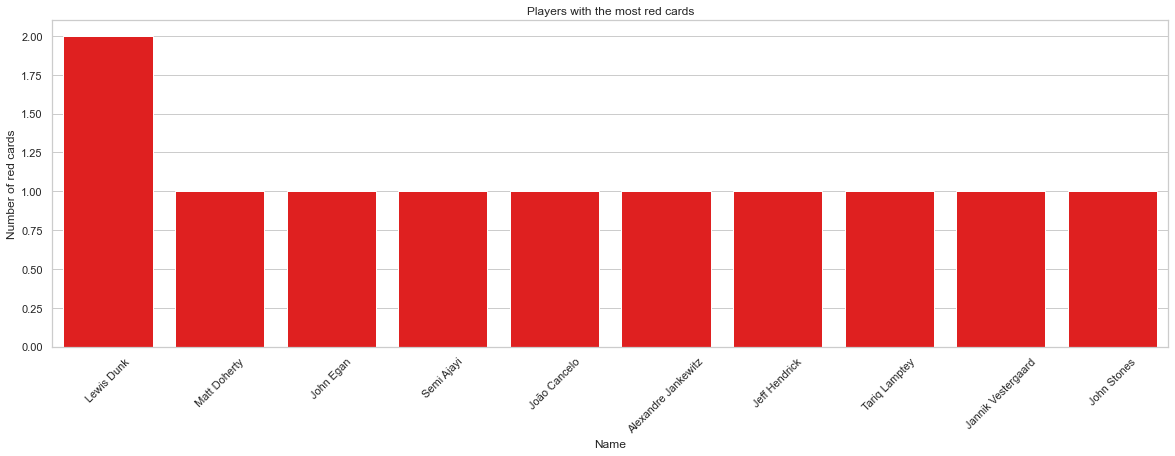

In [42]:
pl_red_cards = pl_df.sort_values(by = 'Red_Cards', ascending = False)[:10]
plt.figure(figsize = (20,6))
plt.title('Players with the most red cards')
r = sns.barplot(x=pl_red_cards['Name'], y=pl_red_cards['Red_Cards'], label = 'Players', color='red')
plt.ylabel('Number of red cards')
r.set_xticklabels(r.get_xticklabels(), rotation = 45)
r